# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [5]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [6]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [21]:
#  1. Get the total rides for each city type
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

#urban_ride_count.head()
#suburban_ride_count.head()
#rural_ride_count.head()
total_rides_bytype = pyber_data_df.groupby(["type"]).count()["ride_id"]
print(total_rides_bytype)

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64


In [28]:
# 2. Get the total drivers for each city type
total_drivers_bytype = city_data_df.groupby(["type"]).sum()["driver_count"]
print(total_drivers_bytype)

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64


In [26]:
#  3. Get the total amount of fares for each city type
total_fares_bytype = pyber_data_df.groupby(["type"]).sum()["fare"]
print(total_fares_bytype)

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64


In [29]:
#  4. Get the average fare per ride for each city type. 
average_fare_per_ride = pyber_data_df.groupby(["type"]).mean()["fare"]
print(average_fare_per_ride)

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64


In [30]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver = total_fares_bytype / total_drivers_bytype
print(average_fare_per_driver)

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64


In [34]:
#  6. Create a PyBer summary DataFrame. 

pyber_summary_df = pd.DataFrame({"Total Ride": total_rides_bytype,
                                  "Total Drivers": total_drivers_bytype, 
                                  "Total Fares": total_fares_bytype,
                                  "Average Fare per Ride": average_fare_per_ride,
                                  "Average Fare per Driver": average_fare_per_driver})

pyber_summary_df


,Total Ride,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [38]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Ride,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [42]:
#  8. Format the columns.

pyber_summary_formatted_df = pd.DataFrame({"Total Ride": total_rides_bytype.map("{:,.2f}".format),
                                  "Total Drivers": total_drivers_bytype.map("{:,.2f}".format), 
                                  "Total Fares": total_fares_bytype.map("${:,.2f}".format),
                                  "Average Fare per Ride": average_fare_per_ride.map("${:,.2f}".format),
                                  "Average Fare per Driver": average_fare_per_driver.map("${:,.2f}".format)})

pyber_summary_formatted_df

,Total Ride,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125.00,78.00,"$4,327.93",$34.62,$55.49
Suburban,625.00,490.00,"$19,356.33",$30.97,$39.50
Urban,"1,625.00","2,405.00","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [43]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [87]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
sum_of_fares_bydate_pertype_df = pyber_data_df.groupby(["date","type"]).sum()["fare"]
sum_of_fares_bydate_pertype_df.index

MultiIndex([('2019-01-01 00:08:16',    'Urban'),
            ('2019-01-01 00:46:46', 'Suburban'),
            ('2019-01-01 02:07:24', 'Suburban'),
            ('2019-01-01 03:46:50',    'Urban'),
            ('2019-01-01 05:23:21',    'Urban'),
            ('2019-01-01 09:45:36',    'Rural'),
            ('2019-01-01 12:32:48', 'Suburban'),
            ('2019-01-01 14:40:14',    'Urban'),
            ('2019-01-01 14:42:25',    'Urban'),
            ('2019-01-01 14:52:06', 'Suburban'),
            ...
            ('2019-05-07 20:05:15',    'Urban'),
            ('2019-05-07 20:22:19',    'Urban'),
            ('2019-05-07 20:40:29', 'Suburban'),
            ('2019-05-08 01:54:18',    'Urban'),
            ('2019-05-08 02:31:25',    'Urban'),
            ('2019-05-08 04:20:00',    'Urban'),
            ('2019-05-08 04:39:49',    'Urban'),
            ('2019-05-08 07:29:01',    'Urban'),
            ('2019-05-08 11:38:35',    'Urban'),
            ('2019-05-08 13:10:18',    'Urban')],
   

In [88]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
sum_of_fares_bydate_pertype_df = sum_of_fares_bydate_pertype_df.reset_index()


In [89]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
sum_of_fares_bydate_pertype_pivot_df = sum_of_fares_bydate_pertype_df.pivot(index="date", columns="type", values="fare")
sum_of_fares_bydate_pertype_pivot_df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [96]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
date_range_df = sum_of_fares_bydate_pertype_pivot_df.loc['2019-01-01':'2019-04-29']
date_range_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [99]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
date_range_df.index = pd.to_datetime(date_range_df.index)

In [100]:
# 7. Check that the datatype for the index is datetime using df.info()
date_range_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [103]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
date_range_byweek_df = date_range_df.resample("w").sum()
date_range_byweek_df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


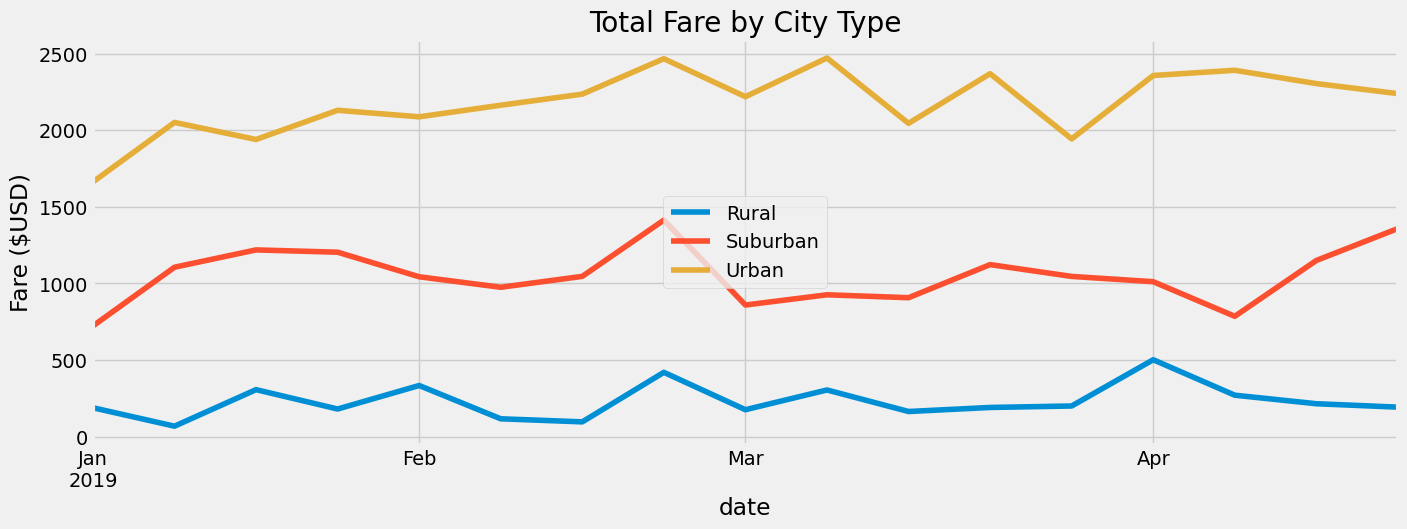

In [129]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
import matplotlib.pyplot as plt
#Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
plt.style.use('fivethirtyeight')

ax1 = date_range_byweek_df.plot(use_index=True)

ax1.set_ylabel("Fare ($USD)")
ax1.set_title("Total Fare by City Type")
ax1.legend(loc="center")
fig = plt.gcf()
fig.set_size_inches(15,5)
fig.set_dpi(100)

plt.show()